## 스크래핑 결과 시각화하기 (기상청 날씨 정보 조회)

* Selenium과 Seaborn을 이용해 날씨 정보를 가져온 후 Lineplot을 그린다.

### 기상청 날씨 스크래핑

* 가져올 사이트
https://www.weather.go.kr/w/weather/forecast/short-term.do

In [1]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [5]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

driver.get('https://www.weather.go.kr/w/weather/forecast/short-term.do')
# driver.implicity_wait(1)
temps = driver.find_element(By.ID, "my-tchart").text        # 기온 정보
temps = [int(i) for i in temps.replace("℃","").split("\n")] # str -> int
print(temps)

[12, 11, 11, 11, 10, 11, 13, 15, 16, 18, 19, 21, 21, 21, 21, 20, 19, 17]


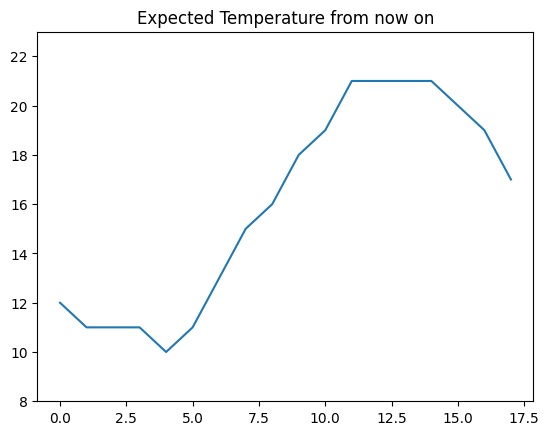

In [10]:
# Line plot : 기온의 추이

import seaborn as sns
import matplotlib.pyplot as plt

plt.ylim(min(temps)-2, max(temps)+2)
plt.title("Expected Temperature from now on")
sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)
plt.show()